In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #to check how accurate our model is
from matplotlib import pyplot as plt
import seaborn as sb

In [29]:
data = pd.read_csv(r'C:\Users\Data Science.DESKTOP-2NH7VUI\OneDrive\machinelearning projects\datasets\Loan_data.csv')

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
data.isnull().sum()/len(data) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## how many of them loan accepted or not using visulization

In [45]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

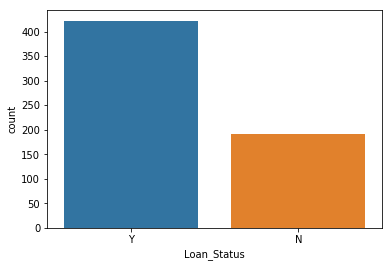

In [51]:
sb.countplot(data['Loan_Status'])


## how many of them loan accepted or not using visulization wrt gender,education,self employed, property area?

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


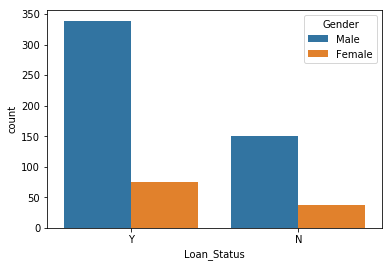

In [59]:
print(pd.crosstab(index=data['Loan_Status'],columns=data['Gender'])) 

sb.countplot(data=data,x='Loan_Status',hue='Gender')

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


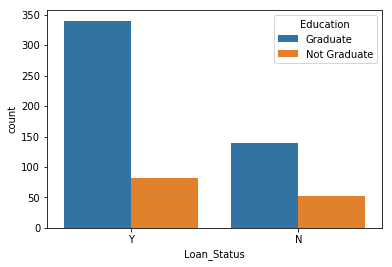

In [58]:
print(pd.crosstab(index=data['Loan_Status'],columns=data['Education'])) 

sb.countplot(data=data,x='Loan_Status',hue='Education')


Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64


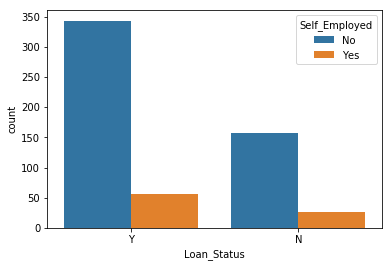

In [64]:
print(data.groupby(data['Self_Employed'])['Loan_Status'].value_counts())
sb.countplot(data=data,x='Loan_Status',hue='Self_Employed')


Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64


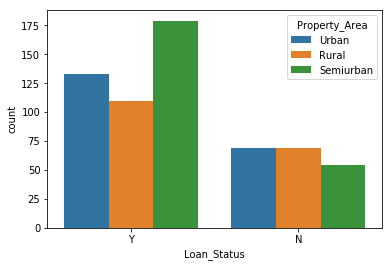

In [73]:
print(data.groupby(data['Property_Area'])['Loan_Status'].value_counts())
sb.countplot(data=data,x='Loan_Status',hue='Property_Area')

## is there any relation between loan status and gender,education,self employed, property area?

- Ho = two attributes are independent
- H1 = two attributes are dependent

In [94]:
freq_tab_gender = pd.crosstab(index=data['Loan_Status'],columns=data['Gender'])
freq_tab_edu = pd.crosstab(index=data['Loan_Status'],columns=data['Education']) 
freq_tab_slfemp = pd.crosstab(index=data['Loan_Status'],columns=data['Self_Employed'])
freq_tab_prprty = pd.crosstab(index=data['Loan_Status'],columns=data['Property_Area'])



In [88]:
from scipy.stats import chi2_contingency

### gender

In [95]:
chi2_contingency(freq_tab_gender)

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569, 152.15141431],
        [ 77.15141431, 336.84858569]]))

since P-value is 0.70 which is greater than level of significance 0.05 we may accept that there is relation ship between loan Status and Gender 

### education

In [96]:
chi2_contingency(freq_tab_edu)

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987,  41.90228013],
        [329.90228013,  92.09771987]]))

since P-value is 0.04 which is lesserr than level of significance 0.05 we may not accept that there is relationship between loan Status and education 

### self employment

In [97]:
chi2_contingency(freq_tab_slfemp)

(0.005292770110001114,
 0.9420039242223718,
 1,
 array([[157.21649485,  25.78350515],
        [342.78350515,  56.21649485]]))

since P-value is 0.94 which is greater than level of significance 0.05 we may accept that there is relation ship between loan Status and Self employment

### Property Area

In [98]:
chi2_contingency(freq_tab_prprty)

(12.297623130485677,
 0.0021360187811644915,
 2,
 array([[ 55.97394137,  72.85993485,  63.16612378],
        [123.02605863, 160.14006515, 138.83387622]]))

since P-value is 0.002 which is lesserr than level of significance 0.05 we may not accept that there is relationship between loan Status and property area

## relationsnhip numerical attributes with loan _status using annova

In [106]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [104]:
from scipy.stats import f_oneway

### applicant income

In [105]:
f_oneway(data[data['Loan_Status']=="Y"]['ApplicantIncome'],
        data[data['Loan_Status']=="N"]['ApplicantIncome'])

F_onewayResult(statistic=0.013574218522301743, pvalue=0.907287812130378)

since P-value is 0.90 which is greater than level of significance 0.05 we may accept that there is relationship between loan Status and Applicant Income

### CoapplicantIncome

In [107]:
f_oneway(data[data['Loan_Status']=="Y"]['CoapplicantIncome'],
        data[data['Loan_Status']=="N"]['CoapplicantIncome'])

F_onewayResult(statistic=2.1514573558666705, pvalue=0.1429482868428829)

since P-value is 0.14 which is greater than level of significance 0.05 we may accept that there is relationship between loan Status and CoapplicantIncome

## handling missing values

In [115]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [117]:
len(data)

614

In [118]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [120]:
(614-480)/614

0.2182410423452769

we see that after droping NAn Values the 21% of data is dropped so this method is not good

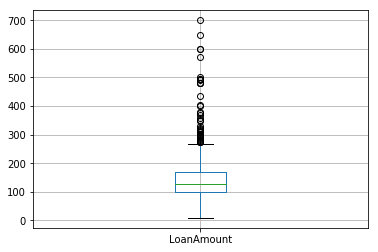

In [141]:
data.boxplot("LoanAmount")

In [129]:
for i in data.columns:
    print(i)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
